## Student Performance Prediction using Machine Learning using Students performance dataset

## Objective

To build a machine learning model that predicts student math performance based on demographic and academic features such as gender, parental education, lunch type, and preparation course.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import tkinter as tk
from tkinter import ttk

In [66]:
d = pd.read_csv("../Data/StudentsPerformance.csv")
d.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [67]:
print("Shape:", d.shape)
d.info()
d.describe()

Shape: (1000, 8)
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race/ethnicity               1000 non-null   str  
 2   parental level of education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test preparation course      1000 non-null   str  
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [68]:
print(d.isnull().sum())
print("Duplicates:", d.duplicated().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Duplicates: 0


In [69]:
d = pd.get_dummies(d, drop_first=True)

## Dataset Description

The dataset contains student academic records with the following features:

- Gender
- Race/Ethnicity
- Parental Level of Education
- Lunch Type
- Test Preparation Course
- Reading Score
- Writing Score
- Math Score (Target Variable)

✔ No missing values  
✔ No duplicate records  
✔ 1000 student entries

In [70]:
X = d.drop('math score', axis=1)
y = d[['math score']]

In [71]:
data_encoded = pd.get_dummies(d, drop_first=True)
data_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


## Data Preprocessing

- Checked for null values
- Checked for duplicate rows
- Applied One-Hot Encoding using `pd.get_dummies()`
- Split dataset into training and testing sets (80% / 20%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [74]:
predictions = model.predict(X_test)
print(predictions[:5])

[[76.3879697 ]
 [58.88597004]
 [76.99026483]
 [76.85180448]
 [87.62737816]]


## Model Building

We used **Linear Regression** to predict Math Scores.

Steps:
1. Feature selection
2. Train-test split
3. Model training
4. Model evaluation using:
   - Mean Absolute Error (MAE)
   - R² Score
   

In [ ]:
print("MAE:", mean_absolute_error(y_test, predictions))
print("R2 Score:", r2_score(y_test, predictions))

MAE: 4.214763142474852
R2 Score: 0.8804332983749564


## Model Performance

- MAE measures average prediction error.
- R² Score indicates how well the model explains variance.

Higher R² (close to 1) indicates better performance.

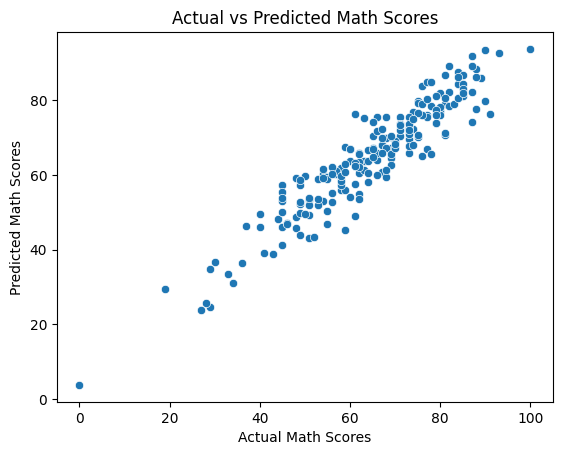

In [76]:
result = pd.DataFrame({
    "Actual": y_test.values.flatten(),
    "Predicted": predictions.flatten()
})
result.head()
sns.scatterplot(x='Actual', y='Predicted', data=result)
plt.title("Actual vs Predicted Math Scores")
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.show()

## Model Visualization

Scatter Plot of Actual vs Predicted Math Scores shows how closely predictions align with real values.

In [ ]:
def predict_score():
    gender = gender_var.get()
    race = race_var.get()
    parent_edu = parentedu_var.get()
    lunch = lunch_var.get()
    test_course = test_var.get()
    reading = int(reading_entry.get())
    writing = int(writing_entry.get())
    new_data = pd.DataFrame({
        'gender': [gender],
        'race/ethnicity': [race],
        'parental level of education': [parent_edu],
        'lunch': [lunch],
        'test preparation course': [test_course],
        'reading score': [reading],
        'writing score': [writing]
    })
    new_data = pd.get_dummies(new_data)
    new_data = new_data.reindex(columns=X.columns, fill_value=0)
    prediction = model.predict(new_data)
    result_label.config(text=f"Predicted Math Score: {prediction[0]:.2f}")
root = tk.Tk()
root.title("Student Performance Predictor")
root.geometry("500x500")
gender_var = tk.StringVar()
race_var = tk.StringVar()
parentedu_var = tk.StringVar()
lunch_var = tk.StringVar()
test_var = tk.StringVar()
tk.Label(root, text="Gender").pack()
ttk.Combobox(root, textvariable=gender_var,
             values=["male", "female"]).pack()
tk.Label(root, text="Race/Ethnicity").pack()
ttk.Combobox(root, textvariable=race_var,
             values=["group A","group B","group C","group D","group E"]).pack()
tk.Label(root, text="Parental Education").pack()
ttk.Combobox(root, textvariable=parentedu_var,
             values=["high school","some college","associate's degree",
                     "bachelor's degree","master's degree"]).pack()
tk.Label(root, text="Lunch").pack()
ttk.Combobox(root, textvariable=lunch_var,
             values=["standard","free/reduced"]).pack()
tk.Label(root, text="Test Prep Course").pack()
ttk.Combobox(root, textvariable=test_var,
             values=["none","completed"]).pack()
tk.Label(root, text="Reading Score").pack()
reading_entry = tk.Entry(root)
reading_entry.pack()
tk.Label(root, text="Writing Score").pack()
writing_entry = tk.Entry(root)
writing_entry.pack()
tk.Button(root, text="Predict Score",
          command=predict_score).pack(pady=10)
result_label = tk.Label(root, text="", font=("Arial", 12))
result_label.pack()
root.mainloop()

## GUI Application

A Tkinter-based GUI was built to:

- Take student details as input
- Perform preprocessing
- Predict Math Score in real-time
- Display prediction instantly

This makes the model interactive and user-friendly.

## Conclusion

The project successfully predicts student math performance using machine learning techniques.

It demonstrates:
- Data preprocessing
- Regression modeling
- Model evaluation
- GUI integration for real-time prediction

This project showcases end-to-end ML implementation.